# Méthodes des  k plus proches voisins 

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
mat = scipy.io.loadmat('mnist-original.mat') # lecture du fichier
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(28,28) for i in range(len(data)) ] # on créé une nouvelle liste qui va contenir nos matrices 28x28

In [3]:
def index_chiffre(n, y):  # elle nous renvoie un tableau contenant les indices représentants le chiffre n
    return [i for i in range(len(y)) if y[i]==n] 

def image_moyenne(n, X, y): # cette fonction renvoie la matrice moyenne (centroïde) pour le chiffre n
    index = index_chiffre(n, y) 
    sum_matrice = np.zeros((28,28)) # la matrice qui sera utilisée dans la somme
    for i in index:
        sum_matrice += X[i] # on somme toutes les matrices représentants le chiffre n
    return sum_matrice/len(index)

def distance(x,y,k): # fonction qui calcule la distance entre deux matrices 
    x = x.reshape(len(x)**2) # x est une matrice carré de "longueur" n donc sa représentation en vecteur sera de taille n*n
    y = y.reshape(len(y)**2)
    return np.linalg.norm(x-y,k)

def prediction(x,centroide, n, k):# on va chercher le centroïde le plus proche de la matrice X_n où n est l'indice de la matrice
    l=[distance(x[n], centroide[i],k) for i in range(10)]
    return (float(l.index(min(l))))

def calcul_pourcentage(n):# renvoie le pourcentage de reussite n représente l'ordre de la norme qu'on va choisir
    prediction_l = [ prediction(X_test,centroide_train, i, n) for i in range(len(X_test)) ]
    A =[i for i,j in zip(y_test,prediction_l) if i==j]
    return(len(A)*100/len(X_test))



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2,random_state=22)

centroide_train = [(image_moyenne(i, X_train, y_train)) for i in range(10)]# on calcul le centroïde pour chaque chiffre i entre 0 et 9 avec X_train et y_train


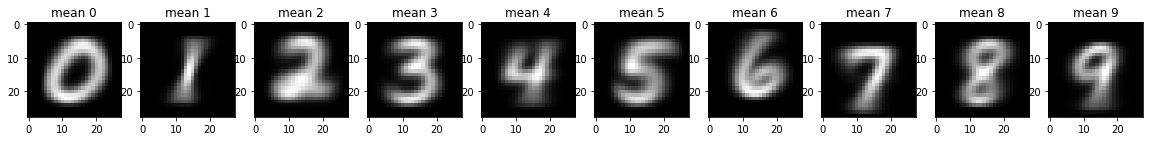

In [5]:
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(centroide_train[i],cmap='gray')
    ax[i].set_title("mean "+str(i))

In [6]:
# On va calculer le pourcentage de réussite pour la norme 2
print("Le pourcentage de précision est {}:".format(calcul_pourcentage(2)))

Le pourcentage de précision est 80.57857142857142:


<function matplotlib.pyplot.show(*args, **kw)>

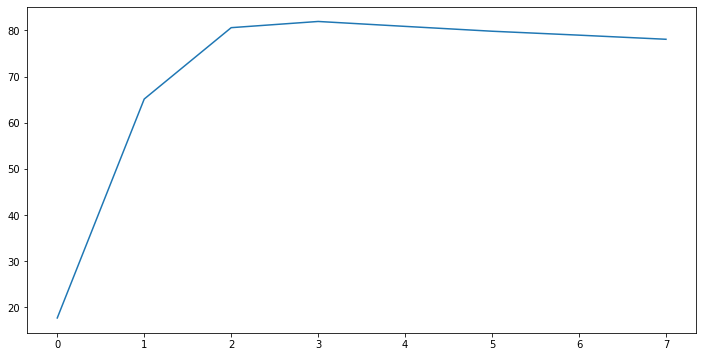

In [7]:
# On va maintenant utiliser plusieur norme L^p
pourcentage = [calcul_pourcentage(i) for i in range(0,8)]
plt.figure(figsize=(12,6)) 
plt.plot(pourcentage)
plt.show

In [8]:
# on voit que le maximum est atteint pour la troisième valeur donc on a de meilleurs résultats pour une norme L^3
for i in range(0,7):
    print("Le pourcentage de précision pour la norme L^"+str(i)+" est égal à "+str(pourcentage[i]))

Le pourcentage de précision pour la norme L^0 est égal à 17.7
Le pourcentage de précision pour la norme L^1 est égal à 65.12142857142857
Le pourcentage de précision pour la norme L^2 est égal à 80.57857142857142
Le pourcentage de précision pour la norme L^3 est égal à 81.92142857142858
Le pourcentage de précision pour la norme L^4 est égal à 80.85714285714286
Le pourcentage de précision pour la norme L^5 est égal à 79.80714285714286
Le pourcentage de précision pour la norme L^6 est égal à 78.95714285714286


#### Ici on utilise une méthode différente pour calcule de la distance entre deux matrices, d'abord je définis la norme matricielle (celle de Frobenius), ensuite je définis la distance entre deux matrices comme étant la norme de la différence, après ça j'utilise le même code que précédemment sauf que je remplace l'ancienne distance par la nouvelle, au final cette méthode est un peu plus rapide que la précédente (environ 4s).

In [9]:
def norme_eucli_matrice(A): # calcul de la norme euclidienne de la matrice
    return np.trace(A@(A.transpose()))**(1/2)
def distance_norme(x,y):
    return norme_eucli_matrice(x-y)
def prediction_norme(x, n):
    l=[distance_norme(x[n], centroide_train[i]) for i in range(10)]
    return (float(l.index(min(l))))

In [10]:
prediction_l = [ prediction_norme(X_test,i) for i in range(len(X_test)) ]
A =[i for i,j in zip(y_test,prediction_l) if i==j]
print("Le pourcentage de précision est {}:".format(len(A)*100/len(X_test)))

Le pourcentage de précision est 80.57857142857142:


### La matrice de confusion:
Elle permet de jauger directement les nombres les plus à même d'être confondus : si la prédiction était sans failles, l'on obtiendrait des nombres le long de la diagonale et des 0 partout ailleurs.

In [11]:
cm = confusion_matrix(y_test,[prediction_norme(X_test,i) for i in range(len(y_test))])
cm

array([[1218,    0,   10,    7,    4,   85,   30,    7,   20,    2],
       [   0, 1529,   14,    3,    1,   11,    2,    2,   20,    1],
       [  32,   85, 1020,   45,   36,    8,   40,   28,   47,    9],
       [  10,   54,   52, 1124,    3,   80,   12,   22,   85,   35],
       [   4,   32,    5,    0, 1089,    2,   17,    7,   15,  178],
       [  22,  103,    8,  179,   42,  855,   26,    8,   14,   35],
       [  14,   53,   43,    1,   27,   46, 1186,    0,    6,    0],
       [  12,   72,   21,    1,   31,    5,    0, 1203,   16,   78],
       [  13,   76,   14,  127,   18,   54,    9,    5,  947,   58],
       [  16,   46,    7,   24,  127,    8,    2,   65,   25, 1110]])

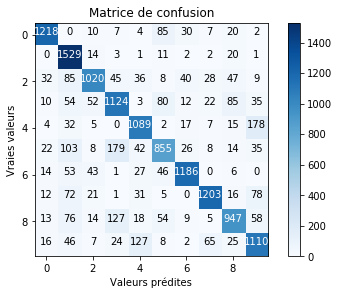

In [12]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
    
fmt = 'd'
thresh = cm.max()/2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt), horizontalalignment="center",color="white" if cm[i,j]> thresh else "black")
        
plt.tight_layout()
plt.ylabel('Vraies valeurs')
plt.xlabel('Valeurs prédites')
plt.show()

### Matrice de confusion normalisée

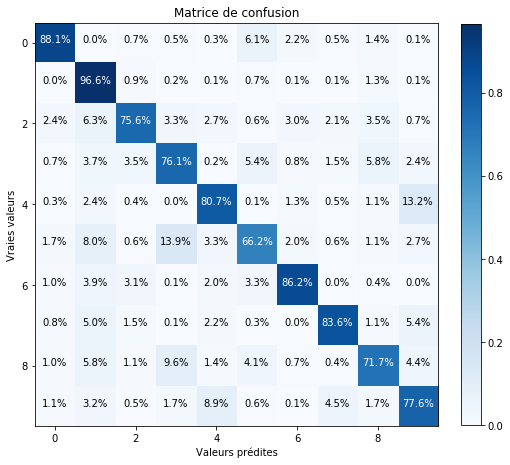

In [13]:
ncm = confusion_matrix(y_test,[prediction_norme(X_test,i) for i in range(len(y_test))], normalize = 'true')

plt.figure(figsize=(7,10))
plt.imshow(ncm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar(fraction= 0.045)
    
fmt = ".1%"
thresh = ncm.max()/2.
for i, j in itertools.product(range(ncm.shape[0]), range(ncm.shape[1])):
    plt.text(j,i,format(ncm[i,j], fmt), horizontalalignment="center",color="white" if ncm[i,j]> thresh else "black")
        
plt.tight_layout()
plt.ylabel('Vraies valeurs')
plt.xlabel('Valeurs prédites')
plt.show()

### Observations:
On observe que le chiffre 1 est le mieux prédit par l'algorithme (96,5% de prédictions justes), tandis que le chiffre 5 est le moins bien prédit. Cette grille nous permet également de constater que les chiffres les plus confondus entre eux sont les 3 et 5, ainsi que les 4 et 9. Il peut être intéressant de s'attarder plus longuement sur les causes de ces confusions

#### Visualisation des valeurs erronnées 
On affiche les valeurs mal prédites pour essayer de comprendre les erreurs. 
Voici les images des zéros qui ont été classés comme étant des deux. 

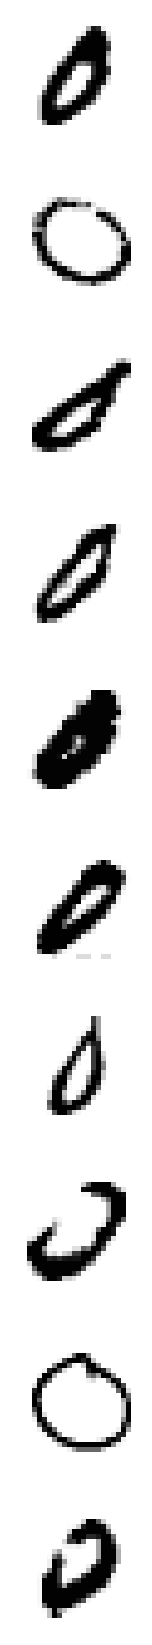

In [14]:
idx = np.where((y_test == 0))[0]
predictions_idx = np.array([ np.int(prediction_norme(X_test,i)) for i in idx])
indices = [idx[i] for i in np.where((predictions_idx == 2))[0]]

fig = plt.figure(figsize = (30,30))
for i in range(len(indices)):
    ax= fig.add_subplot(len(indices),1,i+1)
    imgplot = plt.imshow(np.reshape(np.array(X_test)[indices[i],:],(28,28)), cmap = plt.cm.get_cmap('Greys'))
    imgplot.set_interpolation('nearest')
    plt.axis('off')
plt.show()

**Observation**:
Si pour certaines valeurs, on peut comprendre pourquoi l'algorithme a prédit un deux — en particulier pour les 0 très inclinés, pour d'autres, il est difficile de les comprendre. L'avant dernière image, notamment, semble on ne peut plus représentative d'un zéro. 

Observons les images des 5 mal prédits, qui correspondent au plus haut taux d'erreur de notre classifieur.

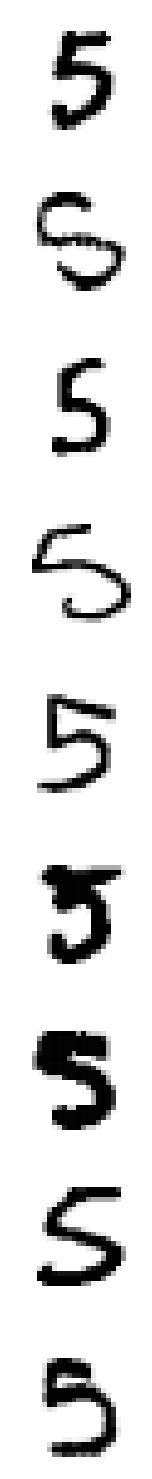

In [15]:
idx = np.where((y_test == 5))[0]
predictions_idx = np.array([ np.int(prediction_norme(X_test,i)) for i in idx])
indices = [idx[i] for i in np.where((predictions_idx == 3))[0]]

fig = plt.figure(figsize = (5,30))
for i in range(1,10):
    ax= fig.add_subplot(10,1,i+1)
    imgplot = ax.imshow(np.reshape(np.array(X_test)[indices[i],:],(28,28)), cmap = plt.cm.get_cmap('Greys'))
    imgplot.set_interpolation('nearest')
    plt.axis('off')
plt.show()

**Observation :**
Quand on visualise ces chiffres, ils ressemblent bien à des 5. Comment augmenter la robustesse de notre algorithme de classification ?

# Data cleaning 

#### On vas essayer de faire un peu de data cleaning pour expliquer les résultats qu'on a eu 

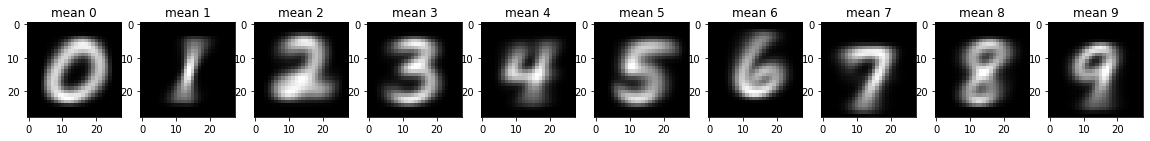

In [16]:
centroide_total = []
for i in range(10): # on calcul le centroïde pour chaque chiffre i entre 0 et 9 avec X et label 
    centroide_total.append(image_moyenne(i, X,label)) 
    
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(centroide_total[i],cmap='gray')
    ax[i].set_title("mean "+str(i))

In [17]:
def liste (x,y,n):# cette fonction Renvoie la liste des matrices de X qui Correspond au chiffre n
    index = index_chiffre(n, y) # j'utilise la fonction définie avant
    L=[]
    for i in range(len(index)):
        j= index[i]
        L.append(x[j])
    return L

def Liste_distance (x,y,n) :# cette fonction va nous renvoyer une liste des distances ente les matrices qui représente le chiffre n et le centroide total 
    Listedistance = []
    L = np.asarray( liste (x,y,n))

    for i in range(len(L)):
        Listedistance.append(distance(L[i],centroide_total[n],3))

    return Listedistance

le nombre de data total qu'on a =70000
le nombre de data total pour le chiffre 0 est = 6903
la distance moyenne = 750.9285621010317
L'écart type est 85.43909446835627


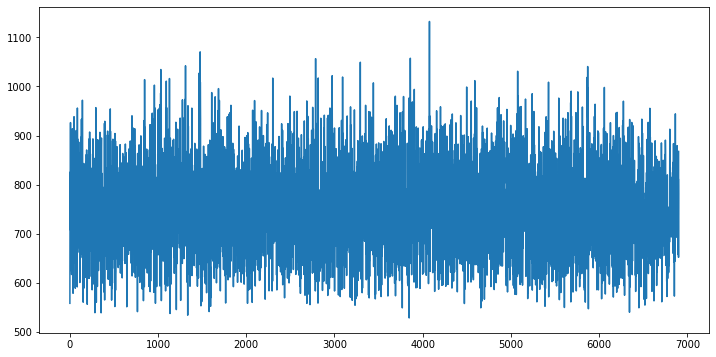

le nombre de data total pour le chiffre 1 est = 7877
la distance moyenne = 570.7487677330272
L'écart type est 112.42221343877821


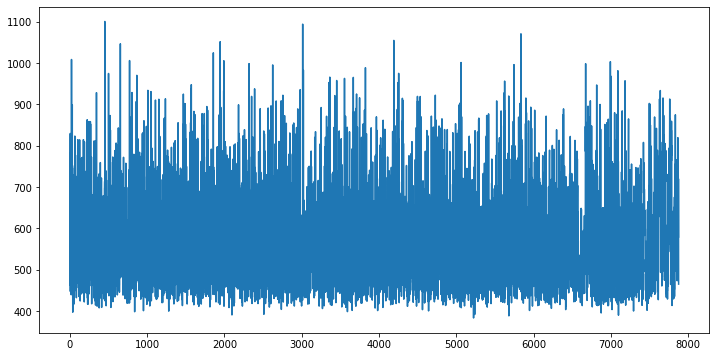

le nombre de data total pour le chiffre 2 est = 6990
la distance moyenne = 763.97852429236
L'écart type est 75.06525019432806


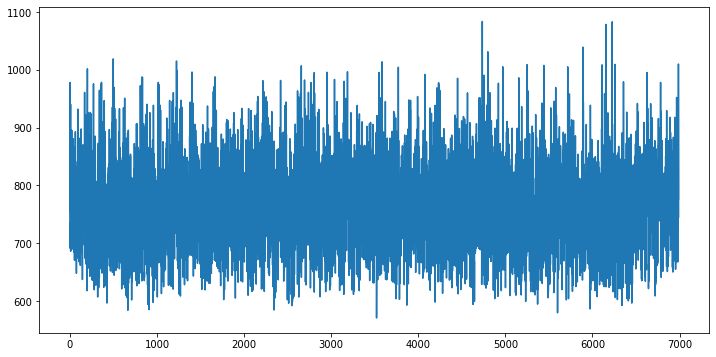

le nombre de data total pour le chiffre 3 est = 7141
la distance moyenne = 730.2938306215921
L'écart type est 93.91378016910859


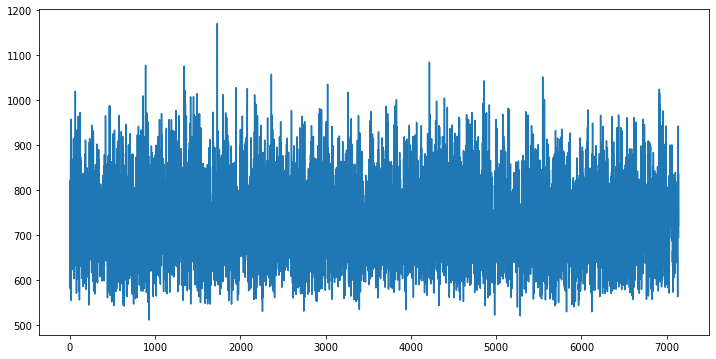

le nombre de data total pour le chiffre 4 est = 6824
la distance moyenne = 714.9637110880728
L'écart type est 89.42021478181256


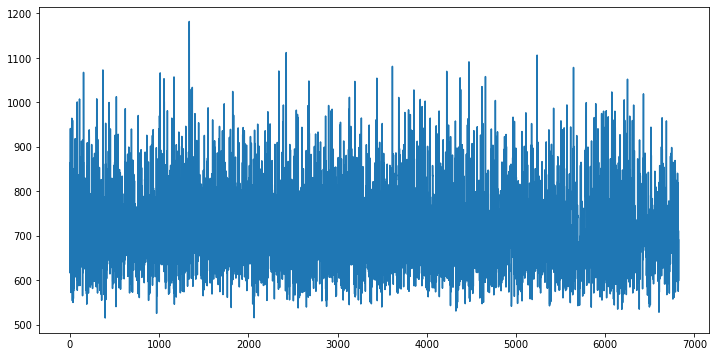

le nombre de data total pour le chiffre 5 est = 6313
la distance moyenne = 745.7578048419014
L'écart type est 85.5523461125827


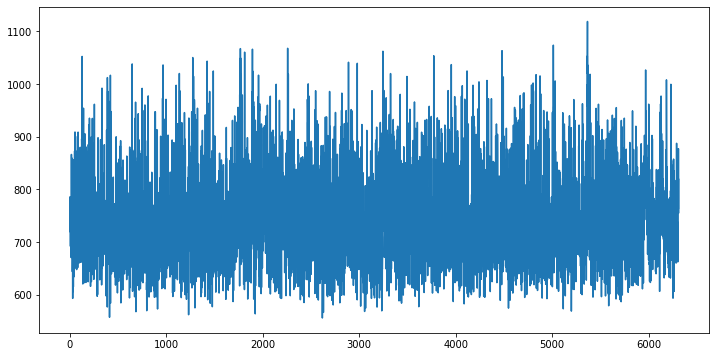

le nombre de data total pour le chiffre 6 est = 6876
la distance moyenne = 716.5554460405808
L'écart type est 99.91033492079619


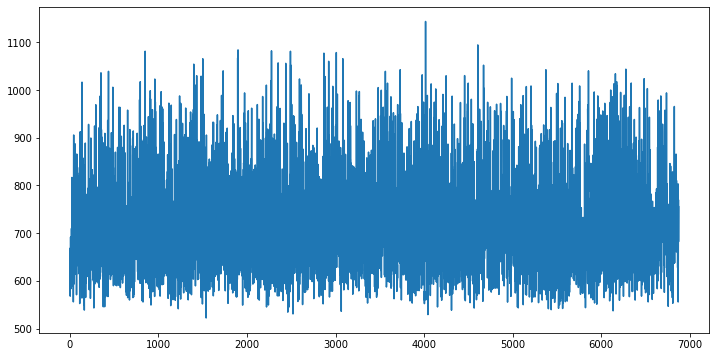

le nombre de data total pour le chiffre 7 est = 7293
la distance moyenne = 690.3016494488359
L'écart type est 105.16034741784877


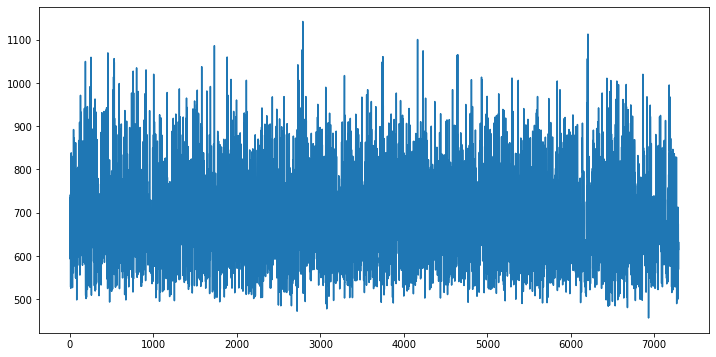

le nombre de data total pour le chiffre 8 est = 6825
la distance moyenne = 727.6066855486777
L'écart type est 94.30467827778114


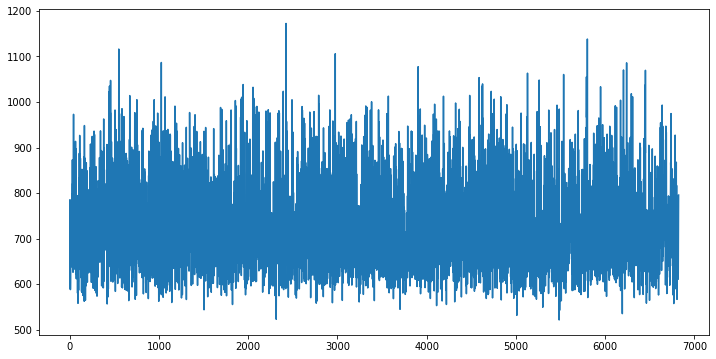

le nombre de data total pour le chiffre 9 est = 6958
la distance moyenne = 689.756066031705
L'écart type est 103.96777598917674


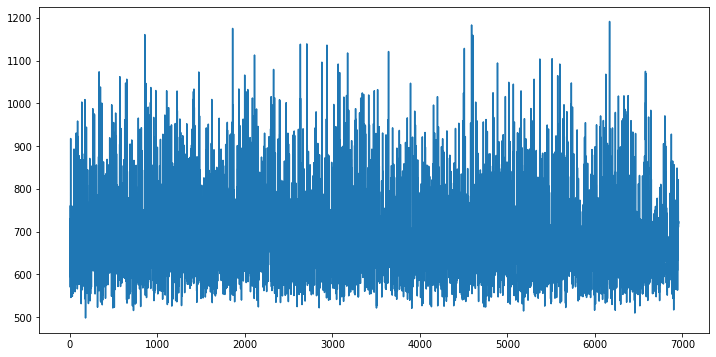

In [18]:
print("le nombre de data total qu'on a ="+str (len(X)))
for i in range(10):
    D = Liste_distance (X,label,i)
    print("le nombre de data total pour le chiffre {} est = {}".format(str(i),str(len(D))))
    print("la distance moyenne = {}".format(str(np.mean(D))))
    print("L'écart type est {}".format(np.std(D)))
    plt.figure(figsize=(12,6))
    plt.plot(range(len(D)),np.asarray(D))
    plt.show()

In [19]:
def liste_propre (x,y,d):
    X_nv = []
    Y_nv = []
    X_fun= []
    Y_fun = []
    for i in range(10):
        
        D = Liste_distance (x,y,i)
        L = liste (x,y,i) 
        for j in range(len(D)):
            M = []
            if D[j] <= d:
                X_nv.append(L[j])
                M.append(i)
                Y_nv.append(M) 
            else :
                X_fun.append(L[j])
                M.append(i)
                Y_fun.append(M) 
    return [X_nv,Y_nv,X_fun,Y_fun] 

67044
le nombre de data total Nettoyée pour le chiffre 0 qu'on a = 6606
le pourcentage de data en moins 4.30247718383312%
la distance moyenne = 742.294356513337
76.3998259238872


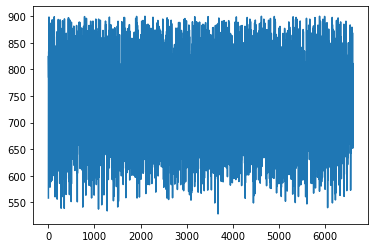

le nombre de data total Nettoyée pour le chiffre 1 qu'on a = 7799
le pourcentage de data en moins 0.9902247048368618%
la distance moyenne = 566.9460800475852
106.21686302154545


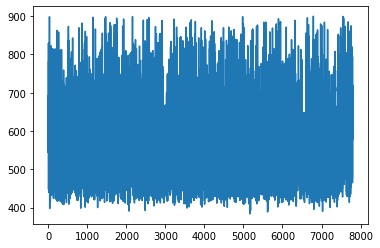

le nombre de data total Nettoyée pour le chiffre 2 qu'on a = 6715
le pourcentage de data en moins 3.934191702432044%
la distance moyenne = 756.7293896979133
66.95017682963851


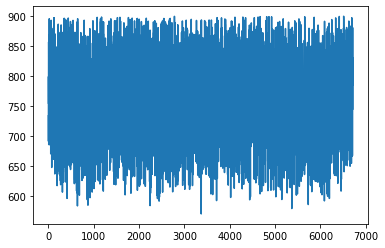

le nombre de data total Nettoyée pour le chiffre 3 qu'on a = 6805
le pourcentage de data en moins 4.705223358073097%
la distance moyenne = 719.8467933990703
82.87418143798372


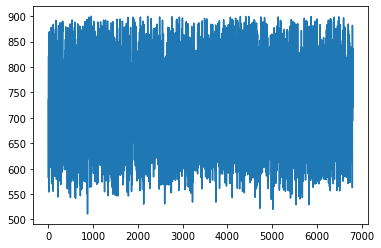

le nombre de data total Nettoyée pour le chiffre 4 qu'on a = 6582
le pourcentage de data en moins 3.546307151230954%
la distance moyenne = 706.1263537894779
77.46193033446235


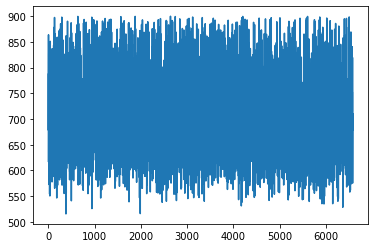

le nombre de data total Nettoyée pour le chiffre 5 qu'on a = 5951
le pourcentage de data en moins 5.734199271344842%
la distance moyenne = 733.4310285074878
70.76889846761006


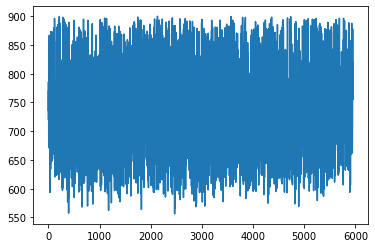

le nombre de data total Nettoyée pour le chiffre 6 qu'on a = 6486
le pourcentage de data en moins 5.671902268760909%
la distance moyenne = 702.1535091322526
82.52666175656654


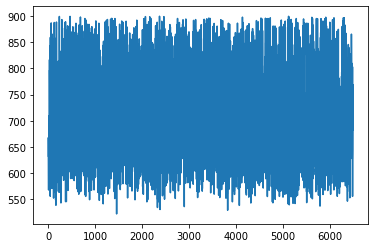

le nombre de data total Nettoyée pour le chiffre 7 qu'on a = 7035
le pourcentage de data en moins 3.5376388317564733%
la distance moyenne = 680.730798469383
93.78407825557355


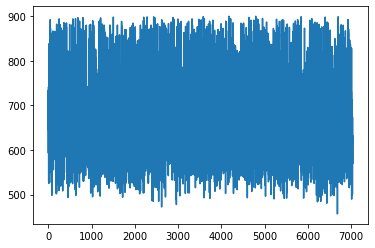

le nombre de data total Nettoyée pour le chiffre 8 qu'on a = 6444
le pourcentage de data en moins 5.5824175824175875%
la distance moyenne = 714.3047377973368
78.30082850206392


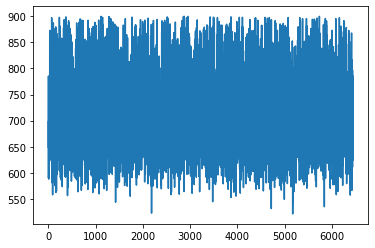

le nombre de data total Nettoyée pour le chiffre 9 qu'on a = 6621
le pourcentage de data en moins 4.843345789019837%
la distance moyenne = 675.6052569702116
83.9796949833046


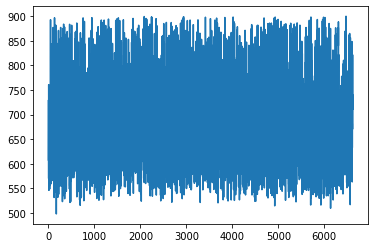

In [20]:
d = 900
X_nv = liste_propre (X,label,d)[0]
Y_nv = np.asarray(liste_propre (X,label,d)[1])
print (len(X_nv))
for i in range(10):
    D_nv = Liste_distance (X_nv,Y_nv,i)
    D = Liste_distance (X,label,i)
    print("le nombre de data total Nettoyée pour le chiffre "+str(i)+ " qu'on a = "+str(len(D_nv)))
    print("le pourcentage de data en moins {}%".format((1-len(D_nv)/len(D))*100))
    print("la distance moyenne = "+str(np.mean(D_nv)))
    print(np.std(D_nv))
    plt.plot(range(len(D_nv)),np.asarray(D_nv))
    plt.show()

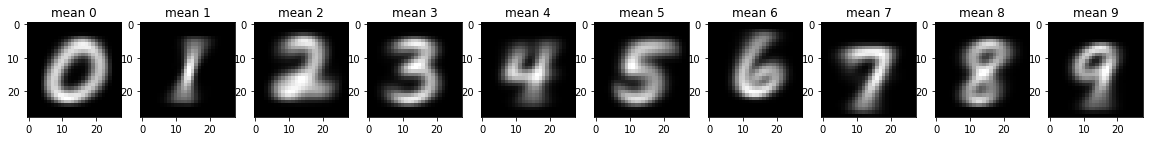

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X_nv,Y_nv,test_size=0.2,random_state=22)
centroide_train = []
for i in range(10): # on calcul le centroïde pour chaque chiffre i entre 0 et 9 avec X_train et y_train
    centroide_train.append(image_moyenne(i, X_train, y_train)) 
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(centroide_train[i],cmap='gray')
    ax[i].set_title("mean "+str(i))

In [22]:
print("Le pourcentage de précision est {}:".format(calcul_pourcentage(2)))

Le pourcentage de précision est 82.89954508166157:


#### Lançons l'algorithme sur des données "impropres" et observons la qualité de la prédiction.

Le pourcentage de précision est 36.67


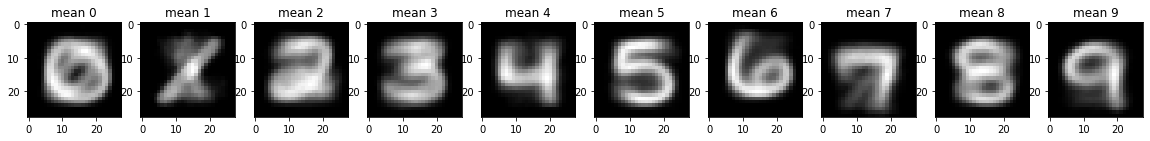

In [23]:
X_fun =liste_propre (X,label,d)[2]
Y_fun= np.asarray(liste_propre (X,label,d)[3])

k = 0 # elle va compter le nombre de fois où l'aglorithme a bien prédit
for i in range(len(X_fun)):
    if Y_fun[i]==prediction_norme(X_fun, i):
        k+=1
print("Le pourcentage de précision est "+'{:.2f}'.format(k*100/len(X_fun)))

centroide_fun = []
for i in range(10): # on calcul le centroïde pour chaque chiffre i entre 0 et 9 avec X_train et y_train
    centroide_fun.append(image_moyenne(i, X_fun, Y_fun)) 
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(centroide_fun[i],cmap='gray')
    ax[i].set_title("mean "+str(i))

# Attention ⚠️  La prochaine Ligne prends du temps pour s'executer 

Traçons les pourcentage de précision pour chaque distance d 

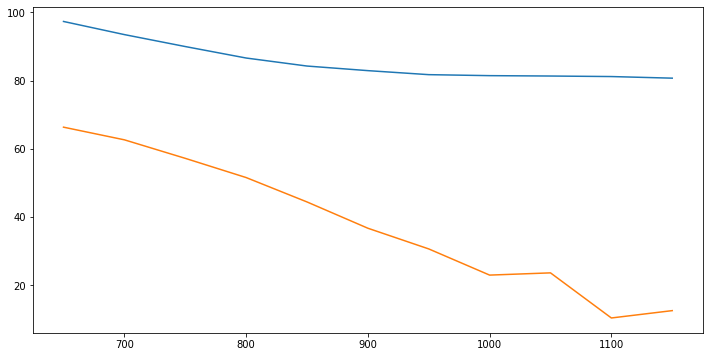

In [24]:
L_sale = []
L_prop = []

for d in range(650,1200,50):
        
    X_nv = liste_propre (X,label,d)[0]
    Y_nv = np.asarray(liste_propre (X,label,d)[1])
    X_fun =liste_propre (X,label,d)[2]
    Y_fun= np.asarray(liste_propre (X,label,d)[3])
        
    X_train, X_test, y_train, y_test = train_test_split(X_nv,Y_nv,test_size=0.2,train_size=0.8,random_state=22)
    
    centroide_train = [image_moyenne(i, X_train, y_train) for i in range(10) ]
        
    prediction_1 = [ prediction(X_fun,centroide_train, i, 2) for i in range(len(X_fun)) ]
    A =[i for i,j in zip(Y_fun,prediction_1) if i==j]
    L_sale.append((len(A)*100/len(X_fun)))
                  
    prediction_2 = [ prediction(X_test,centroide_train, i, 2) for i in range(len(X_test)) ]
    B =[i for i,j in zip(y_test,prediction_2) if i==j]
    L_prop.append((len(B)*100/len(X_test)))
                  
D=[i for i in range(650,1200,50)] 
plt.figure(figsize=(12,6))
plt.plot(D,L_prop)
plt.plot(D,L_sale)

plt.show()